In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv(r'data/truncatedWeather.csv')
#this csv has a year field and has been truncated to 1957

In [2]:
weather.columns

Index([u'Unnamed: 0', u'Date', u'Maximum Temperature degrees (F)',
       u'Minimum Temperature degrees (F)', u'Precipitation (inches)',
       u'Snow (inches)', u'Snow Depth (inches)', u'Year'],
      dtype='object')

In [3]:
# need to make the low temps floats (the highs already are)
weather['Minimum Temperature degrees (F)'] = weather['Minimum Temperature degrees (F)'].astype('float64')

In [4]:
# next step: try to add the snow depth to the conditional selection
# there are these "T" values that I do not understand
weather['Snow Depth (inches)'] = weather['Snow Depth (inches)'].replace('T',0.0).replace('M',0.0).astype('float64')

Text(0.5,1,'Last 50 Years')

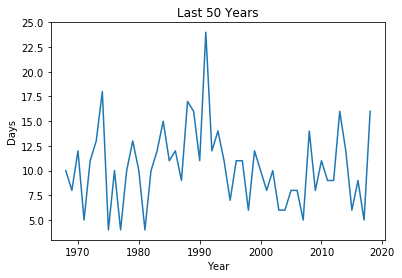

In [26]:
freezeThaw = weather[(weather['Maximum Temperature degrees (F)'] >= 36.0)
                     & (weather['Minimum Temperature degrees (F)'] <= 24.0)
                     & (weather['Snow Depth (inches)']>=1.0)
                     & (weather.Year > 1967)]
plot0 = freezeThaw.groupby('Year').size().plot()
plot0.set_ylabel('Days')
plot0.set_title("Last 50 Years")

Text(0.5,1,'Loose Definition')

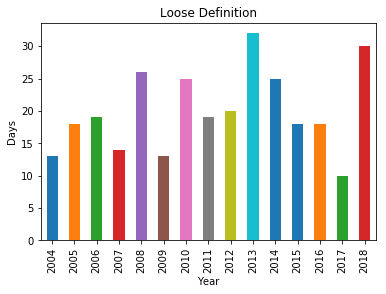

In [24]:
freezeThaw1 = weather[(weather['Maximum Temperature degrees (F)'] >= 34.0)
                     & (weather['Minimum Temperature degrees (F)']<= 30.0)
                     & (weather['Snow Depth (inches)']>=1.0)
                     & (weather.Year > 2003)]
plot2 = freezeThaw1.groupby('Year').size().plot(kind="bar")
plot2.set_ylabel('Days')
plot2.set_title('Loose Definition')

Text(0.5,1,'Strict Definition')

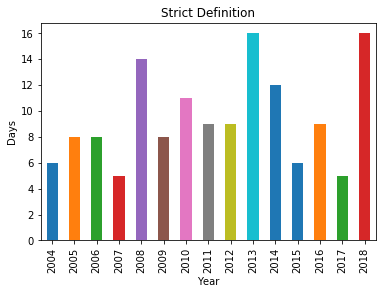

In [23]:
freezeThaw2 = weather[(weather['Maximum Temperature degrees (F)'] >= 36.0)
                     & (weather['Minimum Temperature degrees (F)']<= 24.0)
                     & (weather['Snow Depth (inches)']>=1.0)
                     & (weather.Year > 2003)]
plot3 = freezeThaw2.groupby('Year').size().plot(kind="bar")
plot3.set_ylabel('Days')
plot3.set_title('Strict Definition')

In [18]:
#plot2.figure.savefig(r"loose.png",dpi=300)